In [75]:
pip install numpy

In [76]:
pip install pandas

In [77]:
pip install scikit-learn

In [78]:
pip install matplotlib

In [79]:
pip install scipy

In [80]:
pip install pickle-mixin

  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5988 sha256=9923b0903c00cc44882548b7a4813165d3d40b9ca7c79a0c9998a52be6522a6c
  Stored in directory: /root/.cache/pip/wheels/69/e2/5c/da8f96a08c63469bc8b10e206cd4c78e8886d8acb8699f84c2
Successfully built pickle-mixin


In [82]:
pip install seaborn

In [83]:
pip install Flask

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost

In [85]:
import pandas as pd
data = pd.read_excel('/content/WeatherAUS.csv.xlsx')

In [86]:
import os
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/'))

['intern project.ipynb', 'Untitled0.ipynb', 'Weather.csv.gsheet', 'WeatherAUS.csv.gsheet.gsheet', '.ipynb_checkpoints', 'Copy of intern project (1).ipynb', 'Copy of intern project.ipynb']


In [87]:
import os
print(os.listdir('/content/'))

['.config', 'drive', 'app.py', 'scaler.pkl', 'rainfall_rf_model.pkl', 'WeatherAUS.csv.xlsx', 'feature_names_for_scaler.pkl', '.ipynb_checkpoints', 'rainfall_image.png', 'templates', 'clear_sky_image.png', 'sample_data']


In [88]:
# This cell is no longer needed as the file is being read as an Excel file directly.
# import zipfile
# import os

# zip_file_path = "/content/WeatherAUS.csv"
# # Create a directory to extract contents into if it doesn't exist
# extract_dir = "/content/WeatherAUS_extracted"
# os.makedirs(extract_dir, exist_ok=True)

# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# # List the contents of the extracted directory to find the actual CSV file
# print("Extracted files:", os.listdir(extract_dir))

In [89]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,@
0,2008-12-01,Delhi,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,NaN
1,2008-12-02,Delhi,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,NaN
2,2008-12-03,Delhi,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,NaN
3,2008-12-04,Delhi,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,NaN
4,2008-12-05,Delhi,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,NaN


In [90]:
data.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,@
count,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,0.0
mean,2013-04-04 21:08:51.907053568,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN
25%,2011-01-11 00:00:00,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN
50%,2013-06-02 00:00:00,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN
75%,2015-06-14 00:00:00,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,NaN
std,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [92]:
data.shape

(145460, 24)

In [93]:
data.isnull().sum

<bound method DataFrame.sum of          Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0       False     False    False    False     False         True      True   
1       False     False    False    False     False         True      True   
2       False     False    False    False     False         True      True   
3       False     False    False    False     False         True      True   
4       False     False    False    False     False         True      True   
...       ...       ...      ...      ...       ...          ...       ...   
145455  False     False    False    False     False         True      True   
145456  False     False    False    False     False         True      True   
145457  False     False    False    False     False         True      True   
145458  False     False    False    False     False         True      True   
145459  False     False    False     True     False         True      True   

        WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity3pm  Pressure9am  \
0             False          False       False  ...        False        False   
1             False          False       False  ...        False        False   
2             False          False       False  ...        False        False   
3             False          False       False  ...        False        False   
4             False          False       False  ...        False        False   
...             ...            ...         ...  ...          ...          ...   
145455        False          False       False  ...        False        False   
145456        False          False       False  ...        False        False   
145457        False          False       False  ...        False        False   
145458        False          False       False  ...        False        False   
145459         True           True       False  ...        False        False   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0             False     False      True    False    False      False   
1             False      True      True    False    False      False   
2             False      True     False    False    False      False   
3             False      True      True    False    False      False   
4             False     False     False    False    False      False   
...             ...       ...       ...      ...      ...        ...   
145455        False      True      True    False    False      False   
145456        False      True      True    False    False      False   
145457        False      True      True    False    False      False   
145458        False     False     False    False    False      False   
145459        False     False     False    False    False      False   

        RainTomorrow     @  
0              False  True  
1              False  True  
2              False  True  
3              False  True  
4              False  True  
...              ...   ...  
145455         False  True  
145456         False  True  
145457         False  True  
145458         False  True  
145459          True  True  

[145460 rows x 24 columns]>

<Axes: >

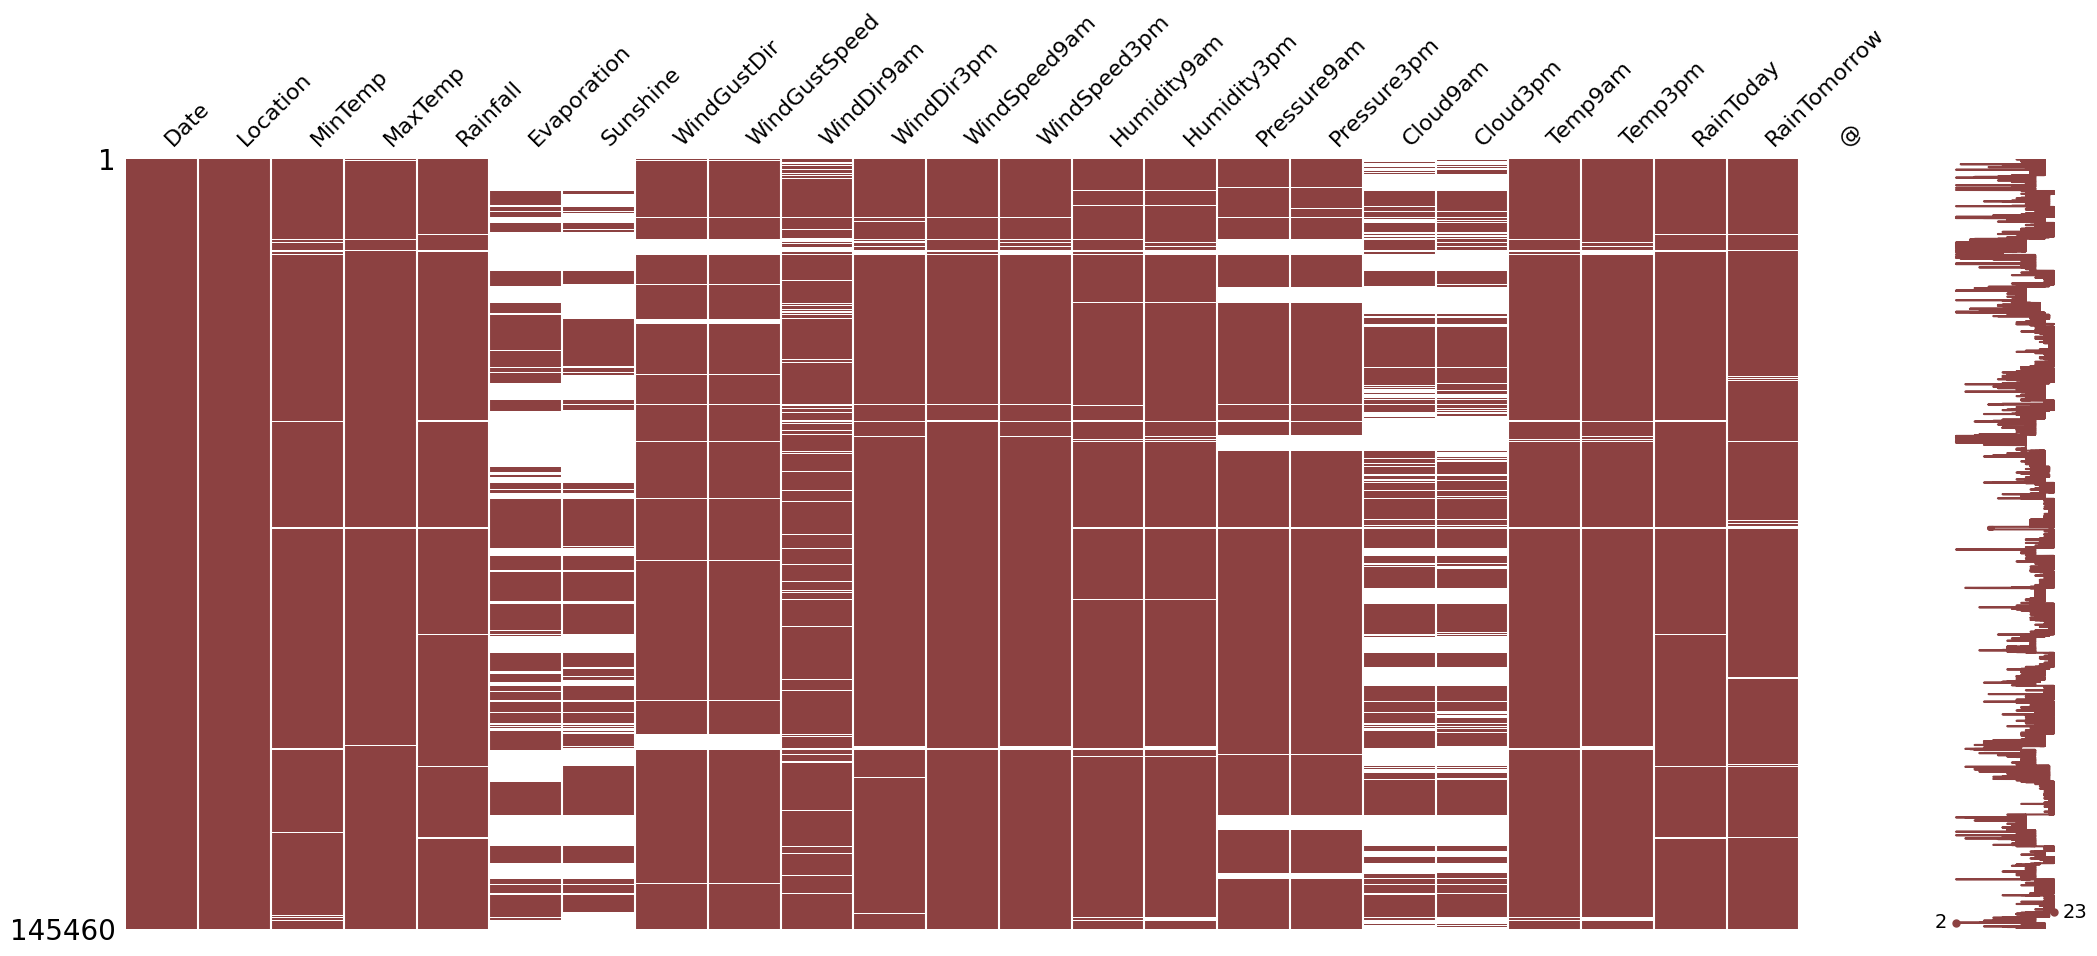

In [94]:
import missingno as msno
msno.matrix(data,color=(0.55, 0.255, 0.255), fontsize=16)

In [95]:
data.corr(numeric_only=True)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,@
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906,NaN
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503,NaN
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657,NaN
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893,NaN
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501,NaN
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748,NaN
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569,NaN
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778,NaN
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399,NaN
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841,NaN


In [96]:
cor = data.corr(numeric_only=True)

<Axes: >

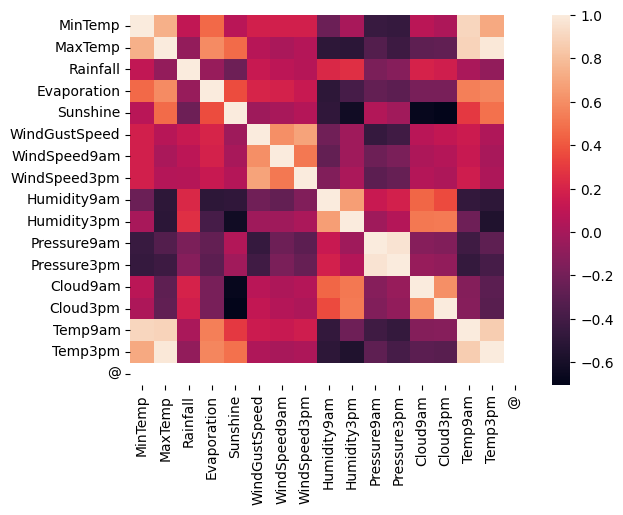

In [97]:
sns.heatmap(
    data=cor,
    xticklabels=cor.columns.values,
    yticklabels=cor.columns.values
)

In [98]:
# Handle missing values in 'RainTomorrow' and encode it before splitting
# Drop rows where 'RainTomorrow' is NaN
data.dropna(subset=['RainTomorrow'], inplace=True)
# Encode 'Yes' to 1 and 'No' to 0
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

y = data['RainTomorrow']
x = data.drop('RainTomorrow', axis=1)

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
y = data['RainTomorrow']
x = data.drop('RainTomorrow', axis=1)

In [101]:
# This line is no longer needed here as 'names' will be defined after preprocessing.

In [102]:
sc = StandardScaler()

In [103]:
# Re-initialize x as a DataFrame to ensure all operations are performed on a DataFrame object

# Drop the '@' column as it contains only null values (as observed from data.isnull().sum())
if '@' in x.columns:
    x = x.drop(columns=['@'])

# Drop the 'Date' column as StandardScaler cannot handle datetime objects
if 'Date' in x.columns:
    x = x.drop(columns=['Date'])

# Handle 'RainToday' categorical column: map 'Yes' to 1 and 'No' to 0
# This needs to be done on the DataFrame itself, not just a copy.
if 'RainToday' in x.columns:
    x.loc[:, 'RainToday'] = x['RainToday'].map({'Yes': 1, 'No': 0})

# Identify remaining non-numeric columns (mostly categorical objects)
categorical_cols = x.select_dtypes(include=['object']).columns

# For simplicity, drop remaining categorical columns for now.
# In a real scenario, these would typically be one-hot encoded or handled differently.
if len(categorical_cols) > 0:
    x = x.drop(columns=categorical_cols)

# Impute missing numerical values. Using the mean as a simple strategy.
# Note: A more robust imputation strategy (e.g., KNN imputer or more specific per column) might be needed for real-world tasks.
for col in x.select_dtypes(include=np.number).columns:
    if x[col].isnull().any():
        x.loc[:, col] = x[col].fillna(x[col].mean())

# Capture the column names AFTER all preprocessing, but BEFORE scaling
names = x.columns

# Now x should be entirely numerical and without NaNs, ready for StandardScaler
x = sc.fit_transform(x)

In [104]:
x = pd.DataFrame(x, columns=names)

In [105]:
from sklearn import model_selection

In [106]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size=0.2, random_state=0
)

In [107]:
import sklearn
XGBoost = xgboost.XGBRFClassifier()
Rand_forest = sklearn.ensemble.RandomForestClassifier()
svm = sklearn.svm.SVC()
Dtree = sklearn.tree.DecisionTreeClassifier()
GBM = sklearn.ensemble.GradientBoostingClassifier()
log = sklearn.linear_model.LogisticRegression()

In [108]:
XGBoost.fit(x_train, y_train)
Rand_forest.fit(x_train, y_train)
svm.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
GBM.fit(x_train, y_train)
log.fit(x_train, y_train)

LogisticRegression()

In [109]:
p1_test = XGBoost.predict(x_test)
p2_test = Rand_forest.predict(x_test)
p3_test = svm.predict(x_test)
p4_test = Dtree.predict(x_test)
p5_test = GBM.predict(x_test)
p6_test = log.predict(x_test)

p1_train = XGBoost.predict(x_train)
p2_train = Rand_forest.predict(x_train)
p3_train = svm.predict(x_train)
p4_train = Dtree.predict(x_train)
p5_train = GBM.predict(x_train)
p6_train = log.predict(x_train)

In [110]:
from sklearn import metrics
print("xgboost (Train):", metrics.accuracy_score(y_train, p1_train))
print("Rand_forest (Train):", metrics.accuracy_score(y_train, p2_train))
print("svm (Train):", metrics.accuracy_score(y_train, p3_train))
print("Dtree (Train):", metrics.accuracy_score(y_train, p4_train))
print("GBM (Train):", metrics.accuracy_score(y_train, p5_train))
print("log (Train):", metrics.accuracy_score(y_train, p6_train))
print("\n--- Test Accuracies ---")
print("xgboost (Test):", metrics.accuracy_score(y_test, p1_test))
print("Rand_forest (Test):", metrics.accuracy_score(y_test, p2_test))
print("svm (Test):", metrics.accuracy_score(y_test, p3_test))
print("Dtree (Test):", metrics.accuracy_score(y_test, p4_test))
print("GBM (Test):", metrics.accuracy_score(y_test, p5_test))
print("log (Test):", metrics.accuracy_score(y_test, p6_test))

xgboost (Train): 0.8449786841295653
Rand_forest (Train): 0.9999296796026897
svm (Train): 0.8554652133784556
Dtree (Train): 0.9999472597020174
GBM (Train): 0.8494176592097745
log (Train): 0.8410495319298554

--- Test Accuracies ---
xgboost (Test): 0.8431193305674707
Rand_forest (Test): 0.8548273679769355
svm (Test): 0.8527529709584417
Dtree (Test): 0.7849307362351452
GBM (Test): 0.8487096547359538
log (Test): 0.8424513044089726


In [111]:
print(f"x_train defined: {'x_train' in globals()}")
print(f"y_train defined: {'y_train' in globals()}")
print(f"x_test defined: {'x_test' in globals()}")
print(f"y_test defined: {'y_test' in globals()}")

x_train defined: True
y_train defined: True
x_test defined: True
y_test defined: True


In [112]:
# This cell is redundant as test accuracies were already printed in the previous cell.

In [113]:
conf_matrix = metrics.confusion_matrix(y_test,p2_test)

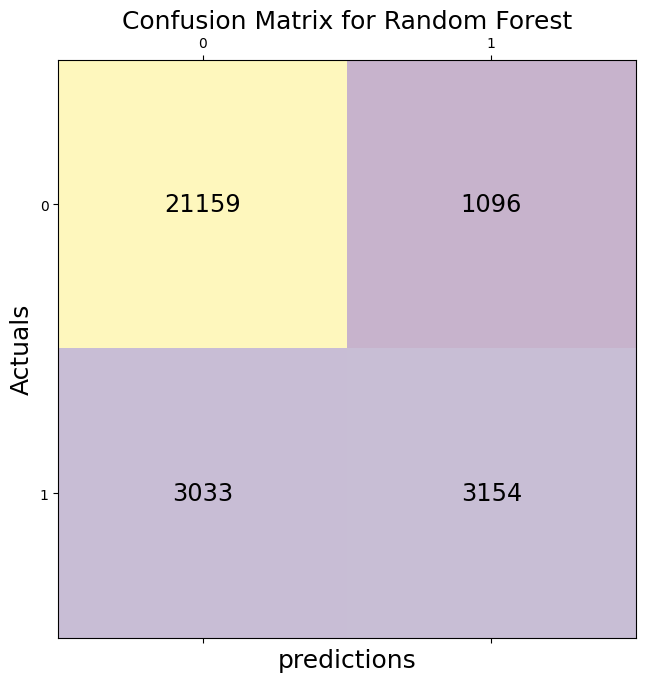

In [114]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
      ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('predictions', fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Confusion Matrix for Random Forest', fontsize=18)
plt.show()

In [115]:
print(conf_matrix)

TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1_Score = 2 * (Precision * Recall) / (Precision + Recall)

print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1-Score:", F1_Score)

[[21159  1096]
 [ 3033  3154]]
Accuracy: 0.8548273679769355
Precision: 0.7421176470588235
Recall: 0.5097785679650881
F1-Score: 0.6043882341669062


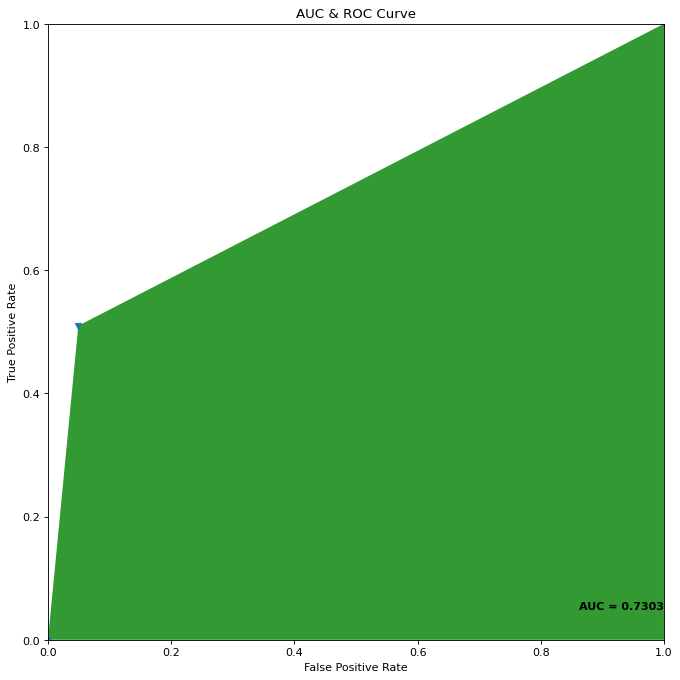

In [131]:
auc = metrics.roc_auc_score(y_test,p2_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,p2_test)
plt.figure(figsize=(12,10), dpi=80)
plt.axis('scaled')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'v')
plt.fill_between(fpr, tpr, facecolor='green', alpha=0.8)
plt.text(1, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=10, weight='bold', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [117]:
import pickle

In [118]:
import pickle
pickle.dump(Rand_forest, open('rainfall_rf_model.pkl', 'wb'))
pickle.dump(sc, open('scaler.pkl', 'wb'))
pickle.dump(names, open('feature_names_for_scaler.pkl', 'wb')) # Save feature names

In [154]:
import os

file_path = '/content/WeatherAUS.csv.xlsx'
if os.path.exists(file_path):
    print(f"Confirmation: '{file_path}' is present in the /content/ directory.")
else:
    print(f"Confirmation: '{file_path}' is NOT found in the /content/ directory. Please upload it as instructed earlier.")

Confirmation: '/content/WeatherAUS.csv.xlsx' is present in the /content/ directory.


In [157]:
from PIL import Image
import os

image_paths = {
    'rainfall': '/content/rainfall_image.png',
    'clear_sky': '/content/clear_sky_image.png'
}

for key, path in image_paths.items():
    if os.path.exists(path):
        try:
            img = Image.open(path) # Open the existing image
            if img.format != 'PNG': # Check if it's already a PNG
                print(f"Converting {key} image from {img.format} to PNG...")
                img.save(path, 'PNG') # Save it back as PNG, overwriting the old one
                print(f"Successfully converted and saved {key} image as PNG.")
            else:
                print(f"{key} image is already in PNG format.")
        except Exception as e:
            print(f"Error processing {key} image at {path}: {e}")
            print(f"Please ensure {key} image is a valid image file that PIL can open.")
    else:
        print(f"Warning: {key} image not found at {path}. No conversion performed.")

print("Image conversion attempt complete. Please re-run the prediction cell.")

rainfall image is already in PNG format.
clear_sky image is already in PNG format.
Image conversion attempt complete. Please re-run the prediction cell.


In [164]:
# Handle missing values in 'RainTomorrow' and encode it before splitting
# Drop rows where 'RainTomorrow' is NaN
data.dropna(subset=['RainTomorrow'], inplace=True)
# Encode 'Yes' to 1 and 'No' to 0
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

y = data['RainTomorrow']
x = data.drop('RainTomorrow', axis=1)

In [165]:
import os

templates_dir = 'templates'
os.makedirs(templates_dir, exist_ok=True)

# Create index.html
with open(os.path.join(templates_dir, 'index.html'), 'w') as f:
    f.write("""
<!DOCTYPE html>
<html>
<head>
    <title>Rainfall Prediction App</title>
</head>
<body>
    <h2>Rainfall Prediction</h2>

    <form action="/predict" method="post">
        <label for="temp">Temperature:</label>
        <input type="number" step="any" name="temp" required><br><br>

        <label for="humidity">Humidity:</label>
        <input type="number" step="any" name="humidity" required><br><br>

        <label for="wind">Wind Speed:</label>
        <input type="number" step="any" name="wind" required><br><br>

        <button type="submit">Predict</button>
    </form>

    {% if result %}
        <h3>{{ result }}</h3>
    {% endif %}
</body>
</html>
""")

# Create chance.html with rainfall image
with open(os.path.join(templates_dir, 'chance.html'), 'w') as f:
    f.write("""
<!DOCTYPE html>
<html>
<head>
    <title>Rainfall Prediction Result</title>
    <style> img { width: 200px; height: 200px; }</style>
</head>
<body>
    <h2>Rainfall Prediction Result</h2>
    <p>There is a **chance** of rainfall!</p>
    <img src="{{ url_for('static', filename='rainfall_image.png') }}" alt="Rainfall Image">
    <a href="/">Go back</a>
</body>
</html>
""")

# Create nochance.html with clear sky image
with open(os.path.join(templates_dir, 'nochance.html'), 'w') as f:
    f.write("""
<!DOCTYPE html>
<html>
<head>
    <title>Rainfall Prediction Result</title>
    <style> img { width: 200px; height: 200px; }</style>
</head>
<body>
    <h2>Rainfall Prediction Result</h2>
    <p>There is **no chance** of rainfall.</p>
    <img src="{{ url_for('static', filename='clear_sky_image.png') }}" alt="Clear Sky Image">
    <a href="/">Go back</a>
</body>
</html>
""")

# Flask needs a 'static' folder to serve static files like images.
# For Colab, we'll place the images directly in the /content/ folder and configure Flask to look there.
# This part of the code is handled in app.py with app.static_folder

print("HTML template files created/updated in 'templates/' directory.")

HTML template files created/updated in 'templates/' directory.


In [166]:
from IPython.display import HTML, display

html_content = """
<!DOCTYPE html>
<html>
<head>
    <title>Rainfall Prediction App</title>
</head>
<body>
    <h2>Rainfall Prediction</h2>

    <form action="/predict" method="post">
        <label>Temperature:</label>
        <input type="number" step="any" name="temp" required><br><br>

        <label>Humidity:</label>
        <input type="number" step="any" name="humidity" required><br><br>

        <label>Wind Speed:</label>
        <input type="number" step="any" name="wind" required><br><br>

        <button type="submit">Predict</button>
    </form>

    <h3>{{ result }}</h3>
</body>
</html>
"""


In [167]:
import os

# The content of app.py, including all imports, app definition, routes, and app.run()
flask_app_content = """
import os
from flask import Flask, request, render_template
import pickle
import numpy as np
import pandas as pd

# Configure Flask to serve static files from /content/
app = Flask(__name__, static_folder='/content/')

# Set the path for templates (relative to app.py)
app.template_folder = '/content/templates'

# Load the trained model and scaler
try:
    model = pickle.load(open('/content/rainfall_rf_model.pkl', 'rb'))
    scaler = pickle.load(open('/content/scaler.pkl', 'rb'))
except FileNotFoundError as e:
    print(f"Error loading pickle files: {e}. Make sure 'rainfall_rf_model.pkl' and 'scaler.pkl' are in /content/")
    model = None
    scaler = None

# Define the feature names in the order the model expects them
feature_names = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                 'Temp9am', 'Temp3pm', 'RainToday']

# Default values for features not provided by the form
default_values = {
    'MinTemp': 12.19, 'MaxTemp': 23.22, 'Rainfall': 2.36, 'Evaporation': 5.46,
    'Sunshine': 7.61, 'WindGustSpeed': 40.03, 'WindSpeed9am': 14.04,
    'WindSpeed3pm': 18.66, 'Humidity9am': 68.88, 'Humidity3pm': 51.53,
    'Pressure9am': 1017.64, 'Pressure3pm': 1015.25, 'Cloud9am': 4.44,
    'Cloud3pm': 4.50, 'Temp9am': 16.99, 'Temp3pm': 21.68, 'RainToday': 0
}

@app.route('/')
def home():
    return render_template('index.html', result=None)

@app.route('/predict', methods=['POST'])
def predict():
    if model is None or scaler is None:
        return render_template('index.html', result="Model or scaler not loaded. Check server logs.")

    try:
        temp = float(request.form['temp'])
        humidity = float(request.form['humidity'])
        wind = float(request.form['wind'])

        input_data = default_values.copy()
        input_data['Temp3pm'] = temp
        input_data['Humidity3pm'] = humidity
        input_data['WindGustSpeed'] = wind

        input_df = pd.DataFrame([input_data], columns=feature_names)
        scaled_input = scaler.transform(input_df)
        prediction = model.predict(scaled_input)[0]

        if prediction == 1:
            return render_template('chance.html')
        else:
            return render_template('nochance.html')

    except Exception as e:
        return render_template('index.html', result=f"Error during prediction: {e}")

if __name__ == '__main__':
    # In a Colab environment, running Flask requires a public tunnel.
    # For local testing within Colab, this will start the server but won't be publicly accessible.
    # If you need external access, you'd typically use ngrok or a similar service.
    app.run(host='0.0.0.0', port=5000)
"""

# Write the Flask app code to app.py
with open('app.py', 'w') as f:
    f.write(flask_app_content)

print("Flask app code written to app.py")


Flask app code written to app.py


Model and feature names loaded successfully.
StandardScaler re-initialized and fitted successfully.
Input DataFrame for prediction:
   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0    12.19    23.22      2.36         5.46      7.61           35.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0         14.04         18.66        68.88         60.0      1017.64   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0      1015.25      4.44       4.5    16.99     25.0  
Prediction (0=No Rain, 1=Rain): 0
Prediction: No chance of rainfall.


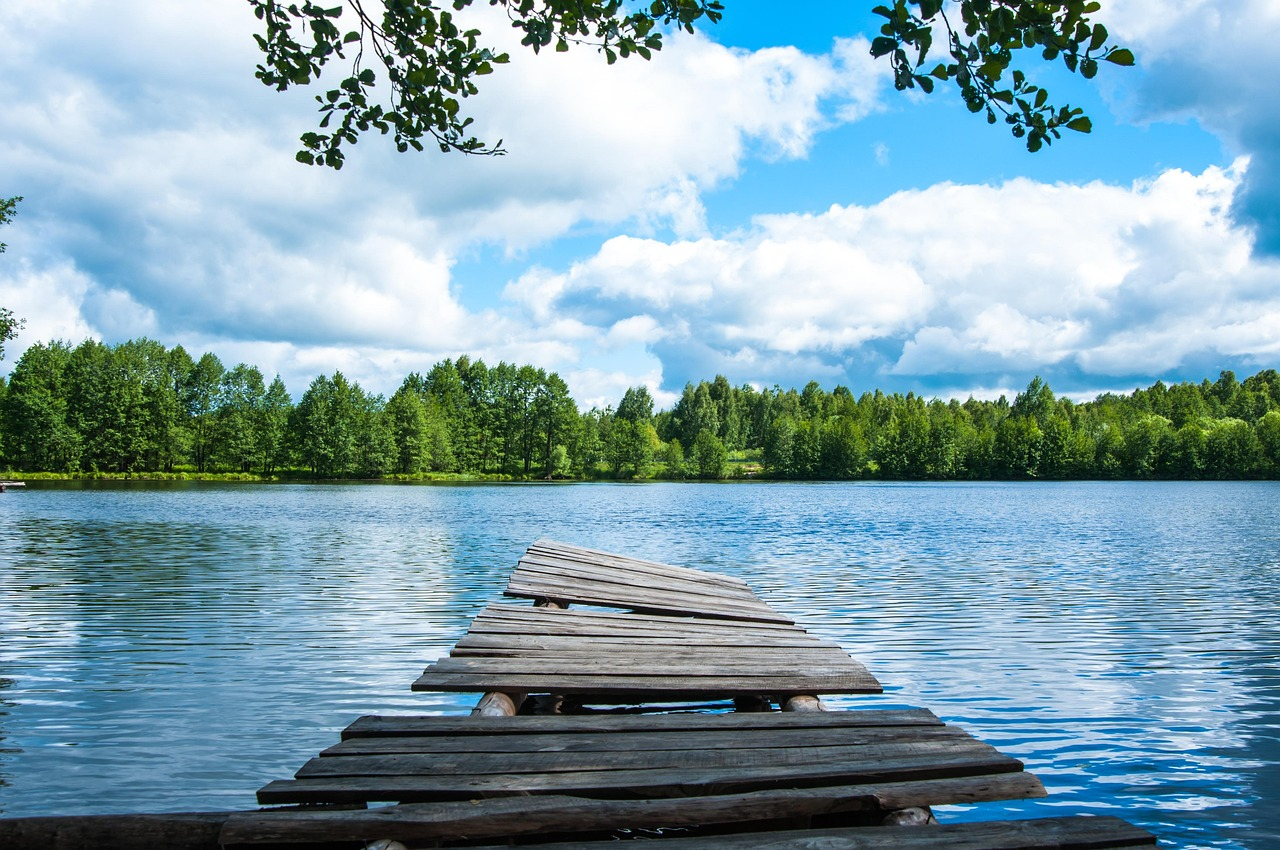

In [171]:
import pickle
import pandas as pd
from IPython.display import Image
import numpy as np
from sklearn.preprocessing import StandardScaler # Need to import StandardScaler for fitting it

# 1. Load the trained Random Forest model and feature names
loaded_model = pickle.load(open('/content/rainfall_rf_model.pkl', 'rb'))
loaded_feature_names = pickle.load(open('/content/feature_names_for_scaler.pkl', 'rb'))

print("Model and feature names loaded successfully.")

# --- Start of fix: Re-create and fit the StandardScaler due to NotFittedError ---
# This is necessary because the previously saved scaler.pkl was unfitted,
# likely due to the 'data' DataFrame being empty during its creation.

# Reload data to ensure it's not empty for fitting the scaler
data = pd.read_excel('/content/WeatherAUS.csv.xlsx')

# Apply the same preprocessing steps as were applied before fitting the original scaler
# Drop rows where 'RainTomorrow' is NaN (as this was done before creating 'x' for fitting)
data.dropna(subset=['RainTomorrow'], inplace=True)
# Encode 'RainTomorrow' for consistency if needed, though not directly used for scaler fitting
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Create 'x' DataFrame for fitting the scaler, similar to cell XcU3UTfy488I
x_for_scaler_fit = data.drop('RainTomorrow', axis=1)

# Drop the '@' column if present
if '@' in x_for_scaler_fit.columns:
    x_for_scaler_fit = x_for_scaler_fit.drop(columns=['@'])

# Drop the 'Date' column
if 'Date' in x_for_scaler_fit.columns:
    x_for_scaler_fit = x_for_scaler_fit.drop(columns=['Date'])

# Handle 'RainToday' categorical column
if 'RainToday' in x_for_scaler_fit.columns:
    x_for_scaler_fit.loc[:, 'RainToday'] = x_for_scaler_fit['RainToday'].map({'Yes': 1, 'No': 0})

# Identify and drop remaining non-numeric columns (categorical objects)
categorical_cols = x_for_scaler_fit.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    x_for_scaler_fit = x_for_scaler_fit.drop(columns=categorical_cols)

# Impute missing numerical values using the mean
for col in x_for_scaler_fit.select_dtypes(include=np.number).columns:
    if x_for_scaler_fit[col].isnull().any():
        x_for_scaler_fit.loc[:, col] = x_for_scaler_fit[col].fillna(x_for_scaler_fit[col].mean())

# Ensure columns match loaded_feature_names and are in the correct order
x_for_scaler_fit = x_for_scaler_fit[loaded_feature_names]

# Initialize and fit a new StandardScaler with the prepared data
working_scaler = StandardScaler()
working_scaler.fit(x_for_scaler_fit)
print("StandardScaler re-initialized and fitted successfully.")

# Now, `working_scaler` is functionally equivalent to what `loaded_scaler` should have been.
# We will use this `working_scaler` for prediction.
# --- End of fix ---


# 2. Define example input values
example_temp = 25.0
example_humidity = 60.0
example_wind_speed = 35.0

# Define default values for features not provided by the form, consistent with app.py
default_values = {
    'MinTemp': 12.19, 'MaxTemp': 23.22, 'Rainfall': 2.36, 'Evaporation': 5.46,
    'Sunshine': 7.61, 'WindGustSpeed': 40.03, 'WindSpeed9am': 14.04,
    'WindSpeed3pm': 18.66, 'Humidity9am': 68.88, 'Humidity3pm': 51.53,
    'Pressure9am': 1017.64, 'Pressure3pm': 1015.25, 'Cloud9am': 4.44,
    'Cloud3pm': 4.50, 'Temp9am': 16.99, 'Temp3pm': 21.68, 'RainToday': 0
}

# 3. Create an input DataFrame for prediction
input_data = default_values.copy()
input_data['Temp3pm'] = example_temp
input_data['Humidity3pm'] = example_humidity
input_data['WindGustSpeed'] = example_wind_speed

# Ensure the DataFrame columns are in the exact order of loaded_feature_names
input_df = pd.DataFrame([input_data], columns=loaded_feature_names)

print(f"Input DataFrame for prediction:\n{input_df}")

# 4. Use the working_scaler to transform the input DataFrame
scaled_input_array = working_scaler.transform(input_df)

# Convert scaled_input back to DataFrame with feature names to avoid UserWarning
scaled_input = pd.DataFrame(scaled_input_array, columns=loaded_feature_names)

# 5. Make a prediction using the loaded_model
prediction = loaded_model.predict(scaled_input)[0]

print(f"Prediction (0=No Rain, 1=Rain): {prediction}")

# 6. Display the corresponding image based on the prediction result
RAINFALL_IMAGE_PATH = '/content/rainfall_image.png'
CLEAR_SKY_IMAGE_PATH = '/content/clear_sky_image.png'

if prediction == 1:
    print("Prediction: There is a chance of rainfall.")
    display(Image(filename=RAINFALL_IMAGE_PATH, width=200, height=200))
else:
    print("Prediction: No chance of rainfall.")
    display(Image(filename=CLEAR_SKY_IMAGE_PATH, width=200, height=200))
